# Research Question 2 - Attention Weight and Path Contribution

[One research](https://arxiv.org/abs/1909.07913) suggests that attention mechanisms, namely attention weights, can be deceiving when used to interpret a neural network's behavior. The current system offers knowledge paths that received high-attention-weight as a form of explanation. This research question investigates the correctness of the system's attention mechanism - do useful knowledge paths receive higher attention weights.

In [1]:
import pickle

with open("data/human.pkl", "rb") as human, open("data/comet.pkl", "rb") as comet:
    experiments = pickle.load(human) + pickle.load(comet)
    
print(f"Total number of experiments: {len(experiments)}")

Total number of experiments: 23


In this analysis, the usefulness of a knowledge path is measured by the performance difference between the system's baseline - the performance with no knowledge path supplied - and the system's performance when only the knowledge path under investigation is provided.

## Baseline Performance

Following the experiment procedure, 100 samples have been generated for each inference instance with no knowledge path supplied. Since all 100 samples of each inference instance have been verified to converge to a single value, we aggregate the result using mean value.

In [2]:
import itertools

import pandas as pd

baselines = pd.DataFrame(
    ((e.story, e.sentence, e.character, s.error)
     for e in experiments for i in e.instances for s in i.samples
     if i.human_size == 0 and i.machine_size == 0),
    columns=("story", "line", "character", "error")
)

baselines

,story,line,character,error
0,0428b530-0cec-4955-b023-0bac60ddf8cc,5,Gina,9.758991
1,0428b530-0cec-4955-b023-0bac60ddf8cc,5,Gina,9.758991
2,0428b530-0cec-4955-b023-0bac60ddf8cc,5,Gina,9.758991
3,0428b530-0cec-4955-b023-0bac60ddf8cc,5,Gina,9.758991
4,0428b530-0cec-4955-b023-0bac60ddf8cc,5,Gina,9.758991
...,...,...,...,...
2295,7a45afb8-18c4-4397-8751-6d8332d88178,5,Tycho,9.384558
2296,7a45afb8-18c4-4397-8751-6d8332d88178,5,Tycho,9.384558
2297,7a45afb8-18c4-4397-8751-6d8332d88178,5,Tycho,9.384558
2298,7a45afb8-18c4-4397-8751-6d8332d88178,5,Tycho,9.384558


In [3]:
baselines.groupby(["story", "line", "character"]).error.nunique()

story                                 line  character   
0428b530-0cec-4955-b023-0bac60ddf8cc  5     Gina            1
0463f79e-2d83-44b7-ad1f-5bcb3f5fd947  3     Finn            1
                                      4     Finn            1
047a5159-6595-4ec2-b7e6-2807b5f0fc78  1     Gary            1
                                      2     Gary            1
05c4681d-f365-438b-8509-58461afb2935  5     A small boy     1
061a896e-12bb-4f3a-a8ec-7e4188228ac9  5     I (myself)      1
171c3ca6-1515-4853-b252-998066f3ceb6  1     Meredith        1
                                      2     Meredith        1
                                      3     Meredith        1
                                      5     Meredith        1
1de18db6-1956-4ea4-8cba-d3147783c6dc  3     Girls           1
                                            Neighborhood    1
                                            Rick            1
5a49eb64-7560-4d40-a9c6-9f5ea7dce513  4     Valerie         1
7a45afb8-18c4

In [4]:
baselines = baselines.groupby(["story", "line", "character"]).error.mean().to_frame("baseline")
baselines

baseline
story                                line character              
0428b530-0cec-4955-b023-0bac60ddf8cc 5    Gina           9.758991
0463f79e-2d83-44b7-ad1f-5bcb3f5fd947 3    Finn           9.133003
                                     4    Finn          10.401987
047a5159-6595-4ec2-b7e6-2807b5f0fc78 1    Gary           5.688166
                                     2    Gary           8.965462
05c4681d-f365-438b-8509-58461afb2935 5    A small boy    7.938198
061a896e-12bb-4f3a-a8ec-7e4188228ac9 5    I (myself)    10.398046
171c3ca6-1515-4853-b252-998066f3ceb6 1    Meredith       6.362483
                                     2    Meredith       9.331755
                                     3    Meredith      11.478771
                                     5    Meredith      10.445042
1de18db6-1956-4ea4-8cba-d3147783c6dc 3    Girls          9.751167
                                          Neighborhood   9.402241
                                          Rick          10.356060
5a49eb64-7560-4d40-a9c6-9f5ea7dce513 4    Valerie       10.618662
7a45afb8-18c4-4397-8751-6d8332d88178 1    Tycho          9.552666
                                     3    Tycho          9.718463
                                     4    Doctor         8.515930
                                          Tycho          8.390974
                                     5    Tycho          9.384558
a3e66276-ef27-426f-8a2f-329779f17038 1    Cook          11.496889
                                     5    Cook          10.495016
b33a2445-7421-4ace-9837-e8f165524ccf 3    Riley          9.730259

## Single Path Contribution

The single-path performances, for each inference instance and knowledge path, is also verified to converge to a single value; thus, the result is aggregated using mean value.

In [5]:
attentions = pd.DataFrame(
    ((e.story, e.sentence, e.character, i.human_size, i.machine_size, s.error, p.content, p.weight)
     for e in experiments for i in e.instances for s in i.samples
     for p in itertools.chain(s.human_paths, s.machine_paths)),
    columns=("story", "line", "character", "human_size", "machine_size", "error", "path", "value")
)

attentions

,story,line,character,human_size,machine_size,error,path,value
0,0428b530-0cec-4955-b023-0bac60ddf8cc,5,Gina,0,1,7.972219,idealism related to realism related to indepen...,1.000000e+00
1,0428b530-0cec-4955-b023-0bac60ddf8cc,5,Gina,0,1,7.945452,grateful related to pleasing related to cheer ...,1.000000e+00
2,0428b530-0cec-4955-b023-0bac60ddf8cc,5,Gina,0,1,8.315418,safety is a condition related to fair related ...,1.000000e+00
3,0428b530-0cec-4955-b023-0bac60ddf8cc,5,Gina,0,1,7.838835,ugly related to unattractive related to power,1.000000e+00
4,0428b530-0cec-4955-b023-0bac60ddf8cc,5,Gina,0,1,7.925570,grateful related to gratitude related to grace...,1.000000e+00
...,...,...,...,...,...,...,...,...
19615595,7a45afb8-18c4-4397-8751-6d8332d88178,5,Tycho,3,66,5.967990,curiosity causes desire read related to magazi...,1.541623e-19
19615596,7a45afb8-18c4-4397-8751-6d8332d88178,5,Tycho,3,66,5.967990,family is a people has a eat,4.477521e-20
19615597,7a45afb8-18c4-4397-8751-6d8332d88178,5,Tycho,3,66,5.967990,order Synonym degree related to doctorate deri...,1.466785e-19
19615598,7a45afb8-18c4-4397-8751-6d8332d88178,5,Tycho,3,66,5.967990,calm related to still Etymologicallyrelated to...,3.290065e-19


In [6]:
attentions[(attentions.human_size == 0) & (attentions.machine_size == 1)]\
    .groupby(["story", "line", "character", "path"])[["error", "value"]].nunique().describe()

,error,value
count,1155.0,1155.0
mean,1.0,1.0
std,0.0,0.0
min,1.0,1.0
25%,1.0,1.0
50%,1.0,1.0
75%,1.0,1.0
max,1.0,1.0


In [7]:
single_path_contributions = attentions[(attentions.human_size == 0) & (attentions.machine_size == 1)]\
    .groupby(["story", "line", "character", "path"])\
    .error.mean().to_frame().join(baselines)\
    .apply(lambda x: x.baseline - x.error, axis=1)\
    .to_frame("contribution")

single_path_contributions

contribution
story                                line character path                                                            
0428b530-0cec-4955-b023-0bac60ddf8cc 5    Gina      approval related to ok Antonym ill Synonym ugly         1.925800
                                                    belonging Synonym possession at location house ...      1.509708
                                                    calm Antonym anger Etymologicallyrelated to ugly        1.940603
                                                    clearly related to doubt related to question re...      1.847294
                                                    competition PartOf sports at location park rela...      1.628199
...                                                                                                              ...
b33a2445-7421-4ace-9837-e8f165524ccf 3    Riley     power related to has related to class                   1.115112
                                                    rest has context physics related to class               1.462081
                                                    rest related to final related to class                  1.455429
                                                    safety related to pin Synonym fall related to drop      1.086926
                                                    status has context medicine related to take Ant...      1.348737

[1155 rows x 1 columns]

## Path Attention Weight

In [Research Question 1](Research%20Question%201.ipynb), we determined that there is a negligible variance in attention weights when path ordering is varied. Since the variation is minute (all weights converges at four significant figures), we used mean value to aggregates the attention weight.

In [8]:
total_path_attentions = attentions.groupby(["story", "line", "character"])\
    .apply(lambda x: x[(x.human_size == 0) & (x.machine_size == x.machine_size.max())])\
    .reset_index(drop=True)[["story", "line", "character", "path", "value"]]\
    .groupby(["story", "line", "character", "path"]).value.mean()\
    .to_frame("attention")

total_path_attentions

attention
story                                line character path                                                            
0428b530-0cec-4955-b023-0bac60ddf8cc 5    Gina      approval related to ok Antonym ill Synonym ugly     1.616903e-15
                                                    approval similar to acclamation has context art...  1.261601e-15
                                                    belonging Synonym possession at location house ...  4.606032e-18
                                                    belonging related to family related to children...  4.167367e-18
                                                    calm Antonym anger Etymologicallyrelated to ugly    4.735764e-15
...                                                                                                              ...
b33a2445-7421-4ace-9837-e8f165524ccf 3    Riley     rest related to final related to class              5.305729e-07
                                                    safety Synonym guard related to correction is a...  1.443955e-11
                                                    safety related to pin Synonym fall related to drop  1.056235e-11
                                                    social related to party Antonym solo related to...  2.765979e-08
                                                    status has context medicine related to take Ant...  1.076834e-08

[1455 rows x 1 columns]

The attention weights and single-path contributions are joined based on the inference instance and knowledge path.

In [9]:
attention_and_contribution = total_path_attentions.join(single_path_contributions).dropna()
attention_and_contribution

attention  \
story                                line character path                                                               
0428b530-0cec-4955-b023-0bac60ddf8cc 5    Gina      approval related to ok Antonym ill Synonym ugly     1.616903e-15   
                                                    belonging Synonym possession at location house ...  4.606032e-18   
                                                    calm Antonym anger Etymologicallyrelated to ugly    4.735764e-15   
                                                    clearly related to doubt related to question re...  6.513240e-17   
                                                    competition PartOf sports at location park rela...  1.062658e-16   
...                                                                                                              ...   
b33a2445-7421-4ace-9837-e8f165524ccf 3    Riley     power related to has related to class               7.615239e-11   
                                                    rest has context physics related to class           1.773439e-06   
                                                    rest related to final related to class              5.305729e-07   
                                                    safety related to pin Synonym fall related to drop  1.056235e-11   
                                                    status has context medicine related to take Ant...  1.076834e-08   

                                                                                                        contribution  
story                                line character path                                                              
0428b530-0cec-4955-b023-0bac60ddf8cc 5    Gina      approval related to ok Antonym ill Synonym ugly         1.925800  
                                                    belonging Synonym possession at location house ...      1.509708  
                                                    calm Antonym anger Etymologicallyrelated to ugly        1.940603  
                                                    clearly related to doubt related to question re...      1.847294  
                                                    competition PartOf sports at location park rela...      1.628199  
...                                                                                                              ...  
b33a2445-7421-4ace-9837-e8f165524ccf 3    Riley     power related to has related to class                   1.115112  
                                                    rest has context physics related to class               1.462081  
                                                    rest related to final related to class                  1.455429  
                                                    safety related to pin Synonym fall related to drop      1.086926  
                                                    status has context medicine related to take Ant...      1.348737  

[1155 rows x 2 columns]

The single-path contribution is normalized for each path within each inference instance; this allows all datapoint from different inference instances to be analyzed together - the behavior of the attention mechanism should not be affected by the inference instance.

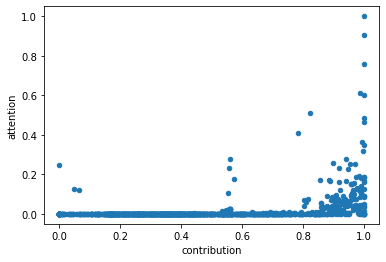

In [10]:
attention_and_normalized_contribution = attention_and_contribution.copy()
attention_and_normalized_contribution.contribution = attention_and_normalized_contribution\
    .groupby(["story", "line", "character"]).contribution\
    .apply(lambda x: (x - x.min()) / (x.max() - x.min()))

attention_and_normalized_contribution.plot(kind="scatter", x="contribution", y="attention")

Spearman's Rank-Order Correlation is used since there should be a positive monotonic relationship between single-path contribution and attention weight.

In [11]:
from scipy import stats

stats.spearmanr(attention_and_normalized_contribution.contribution,
                attention_and_normalized_contribution.attention)

SpearmanrResult(correlation=0.605013329797513, pvalue=2.997311815833052e-116)

## Conclusion

Test statistics suggest a correlation between the single-path contribution and attention weight. Based on the scatter plot, we can infer that high attention-weights imply high single-path contribution, but high single-path contribution does not imply high-attention-weights.